In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

# Zródło danych
https://www.kaggle.com/datasets/zaraavagyan/weathercsv?resource=download

In [2]:
df = pd.read_csv("weather.csv")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
wind_speed = df["WindGustSpeed"][:20]
wind_speed=np.array(wind_speed)

In [4]:
wind_speed_y = np.array(wind_speed)
wind_speed_x = np.arange(0, len(wind_speed_y))

In [5]:
wind_speed_y

array([30., 39., 85., 54., 50., 44., 43., 41., 48., 31., 30., 41., 30.,
       44., 41., 46., 44., 52., 39., 33.])

In [6]:
wind_speed_x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

# Regresja liniowa

In [7]:
k=np.array([1,2,3,4])
l=np.array([2,2,2,2])

In [8]:
k*l

array([2, 4, 6, 8])

In [9]:
n=len(wind_speed_y)

In [10]:
b_nom= np.sum(wind_speed_x*wind_speed_y)-(np.sum(wind_speed_x)*np.sum(wind_speed_y))/n

In [11]:
b_denom = (np.sum(wind_speed_x**2))-(np.sum(wind_speed_x)**2)/n

In [12]:
b=b_nom/b_denom
b

-0.5330827067669173

In [13]:
a=(np.sum(wind_speed_y)/n)-((b*np.sum(wind_speed_x))/n)
a

48.31428571428572

In [14]:
n 

20

In [15]:
x = np.linspace(0,20)

In [16]:
y=b*x+a

<AxesSubplot:>

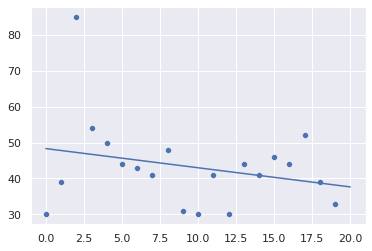

In [17]:
sns.lineplot(x=x,y=y)
sns.scatterplot(x=wind_speed_x,y=wind_speed_y)

# Regresja kwadratowa

In [18]:
wind_speed_x=np.array(range(0,21))
wind_speed_y=np.array([1, 4, 2, 7, 5, 8, 10, 9, 7, 9, 10, 11, 10, 11, 10, 8, 9, 6, 5, 4, 3])

In [19]:
x1 = np.sum(wind_speed_x)
x2 = np.sum(wind_speed_x**2)
x3 = np.sum(wind_speed_x**3)
x4 = np.sum(wind_speed_x**4)
x1y1 = np.sum(wind_speed_x*wind_speed_y)
x2y1 = np.sum(wind_speed_x**2*wind_speed_y)
y1=np.sum(wind_speed_y)
n=len(wind_speed_y)

In [20]:
cA=(n*x2-x1**2)*(x2y1*n-y1*x2)-(n*x3-x1*x2)*(x1y1*n-y1*x1)
cB=(n*x2-x1**2)*(n*x4-x2**2)-(n*x3-x1*x2)*(n*x3-x1*x2)
c=cA/cB
c

-0.08194894350500757

In [21]:
b=(x1y1*n-y1*x1-c*(n*x3-x1*x2))/(n*x2-x1**2)
b

1.7363814675027487

In [22]:
a=(1/n)*(y1-b*x1-c*x2)
a

0.9311123658949774

In [23]:
x = np.linspace(0,20)
y = a+b*x+c*(x**2)

<AxesSubplot:>

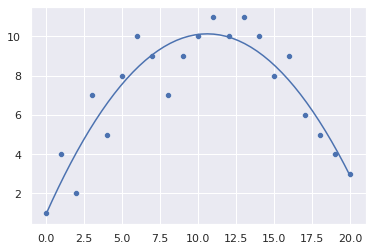

In [24]:
sns.lineplot(x=x,y=y)
sns.scatterplot(x=wind_speed_x,y=wind_speed_y)